[1] "X"                          "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "multi"                     
 [9] "biz"                        "cleanliness_rating"        
[11] "guest_satisfaction_overall" "bedrooms"                  
[13] "dist"                       "metro_dist"                
[15] "attr_index"                 "attr_index_norm"           
[17] "rest_index"                 "rest_index_norm"           
[19] "lng"                        "lat"

Warning message:
"There was 1 warning in `summarize()`.
ℹ In argument: `r = cor(x, realSum, use = "complete.obs")`.
ℹ In group 17: `room_type = Shared room` `feature = bedrooms`.
Caused by warning in `cor()`:
! the standard deviation is zero"
`geom_smooth()` using formula = 'y ~ x'


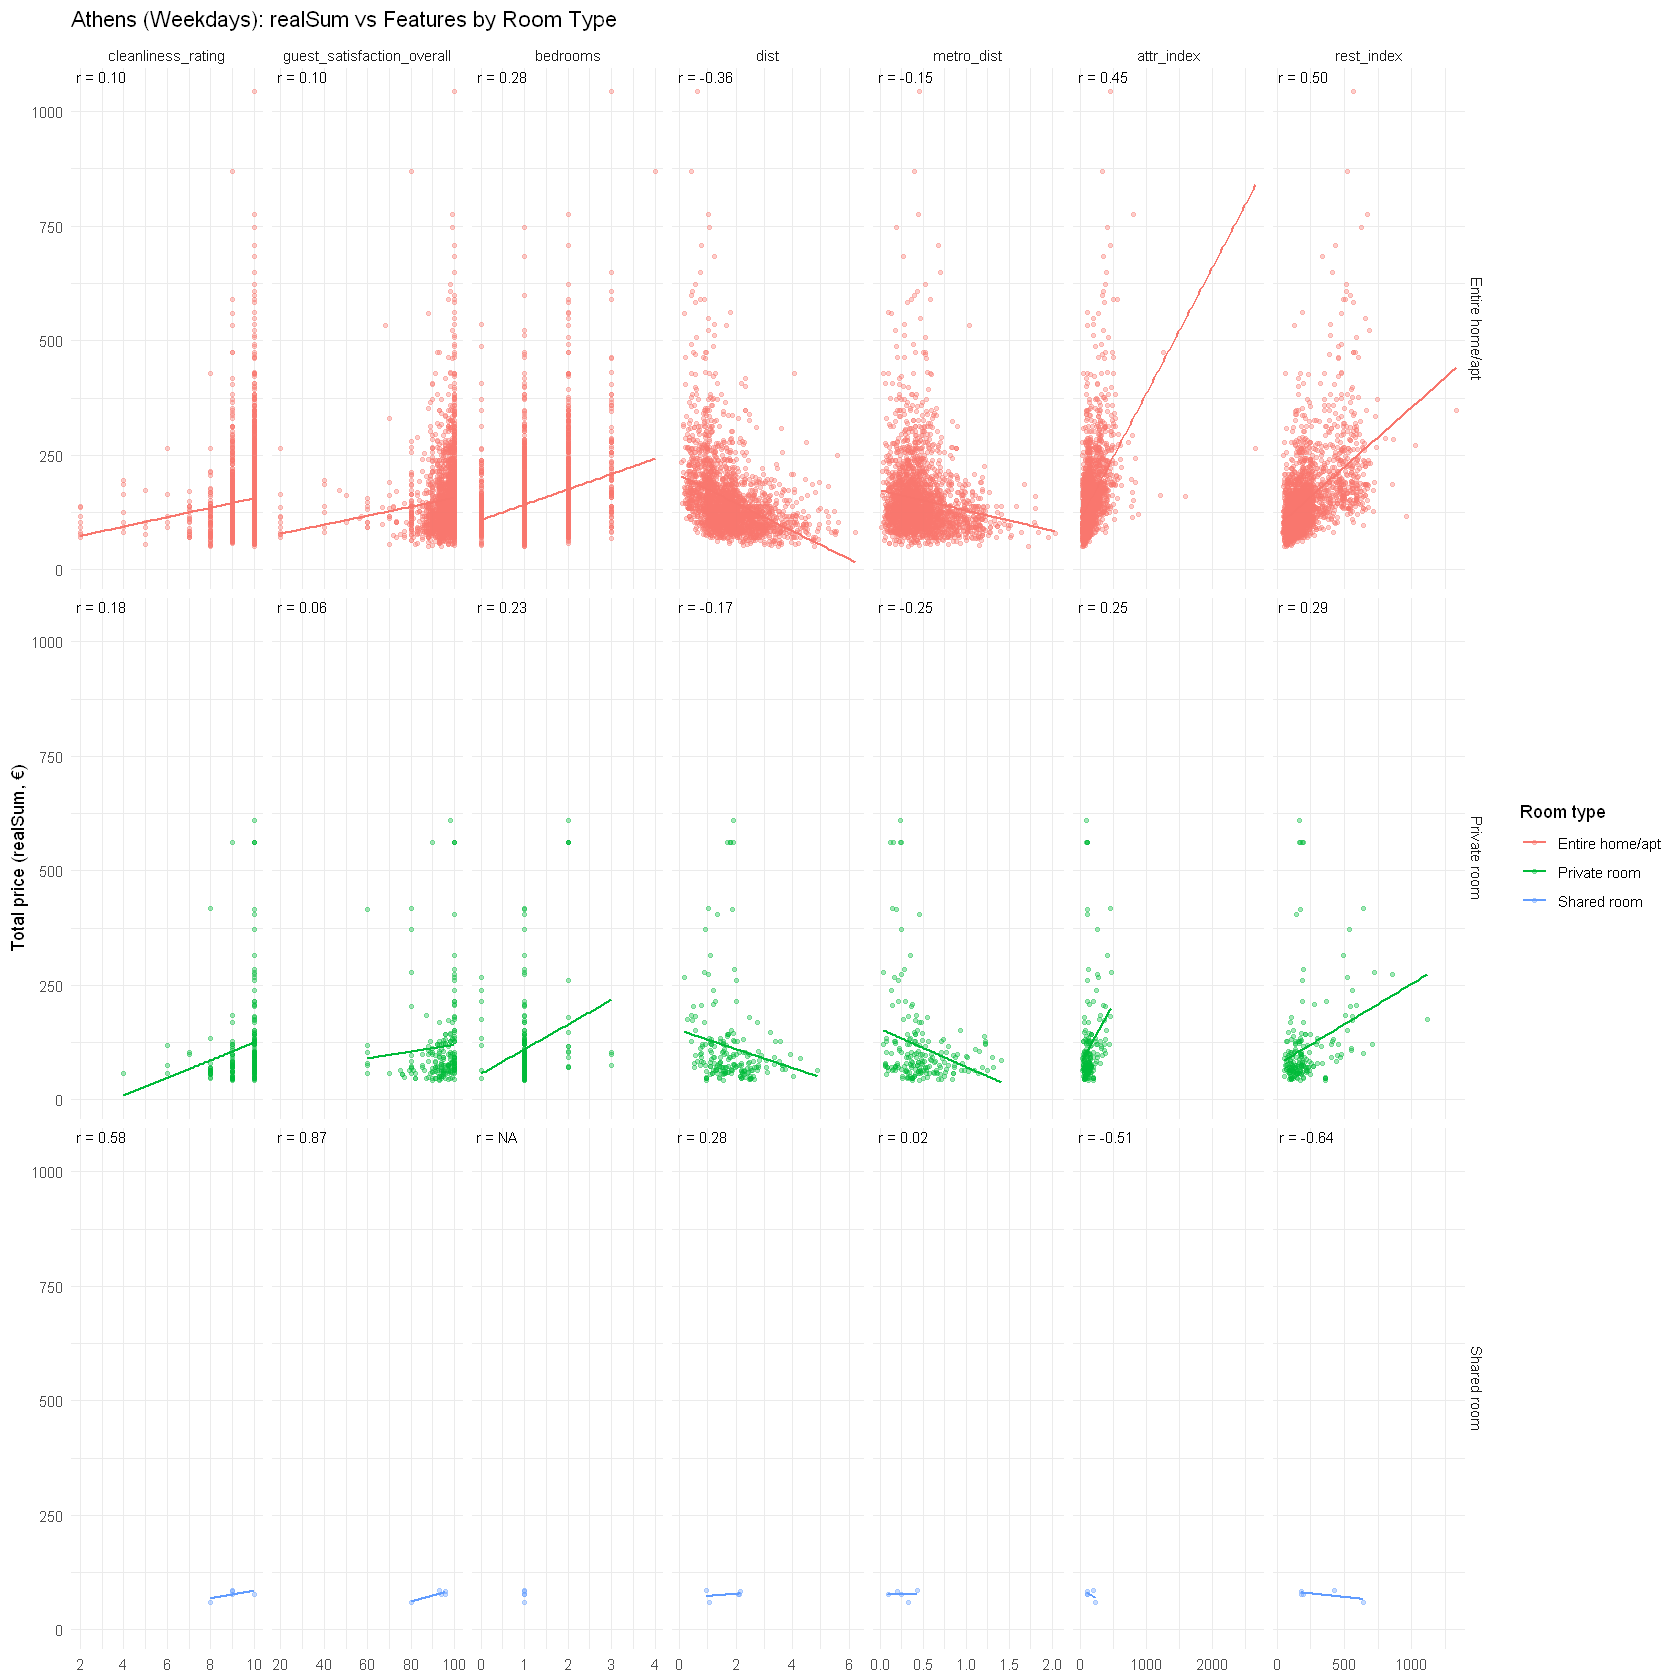

In [11]:
library(tidyverse)

# Read normally
ath_wd <- read.csv("athens_weekdays.csv", check.names = TRUE)

# Optional: check names
names(ath_wd)

# Make sure room_type exists and is categorical
ath_wd <- ath_wd %>% mutate(room_type = factor(room_type))
ath_wd <- ath_wd %>% filter(realSum < 10000)

# Pick variables of interest
vars <- c("cleanliness_rating", "guest_satisfaction_overall", "bedrooms",
          "dist", "metro_dist", "attr_index", "rest_index")

# Remove rows with NA in any of these columns + realSum
ath_wd <- ath_wd %>% drop_na(all_of(c(vars, "realSum")))

# Create long format
df_long <- ath_wd %>%
  pivot_longer(all_of(vars), names_to = "feature", values_to = "x") %>%
  mutate(feature = factor(feature, levels = vars))

# Calculate correlation (Pearson)
cors <- df_long %>%
  group_by(room_type, feature) %>%
  summarize(r = cor(x, realSum, use = "complete.obs"), .groups = "drop")

# Plot: correlation scatter panels
p_corr <- ggplot(df_long, aes(x = x, y = realSum, color = room_type)) +
  geom_point(alpha = 0.35, size = 1.2) +
  geom_smooth(method = "lm", se = FALSE, linewidth = 0.8) +
  geom_text(
    data = cors,
    aes(x = -Inf, y = Inf, label = paste0("r = ", sprintf("%.2f", r))),
    hjust = -0.1, vjust = 1.2, size = 3.2, inherit.aes = FALSE
  ) +
  facet_grid(room_type ~ feature, scales = "free_x") +
  labs(
    title = "Athens (Weekdays): realSum vs Features by Room Type",
    x = NULL,
    y = "Total price (realSum, €)",
    color = "Room type"
  ) +
  theme_minimal(base_size = 11)

options(repr.plot.width = 14, repr.plot.height = 14)
p_corr


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: size.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"The following aesthetics were dropped during statistical transformation: size.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"The following aesthetics were dropped during statistical transformation: size.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


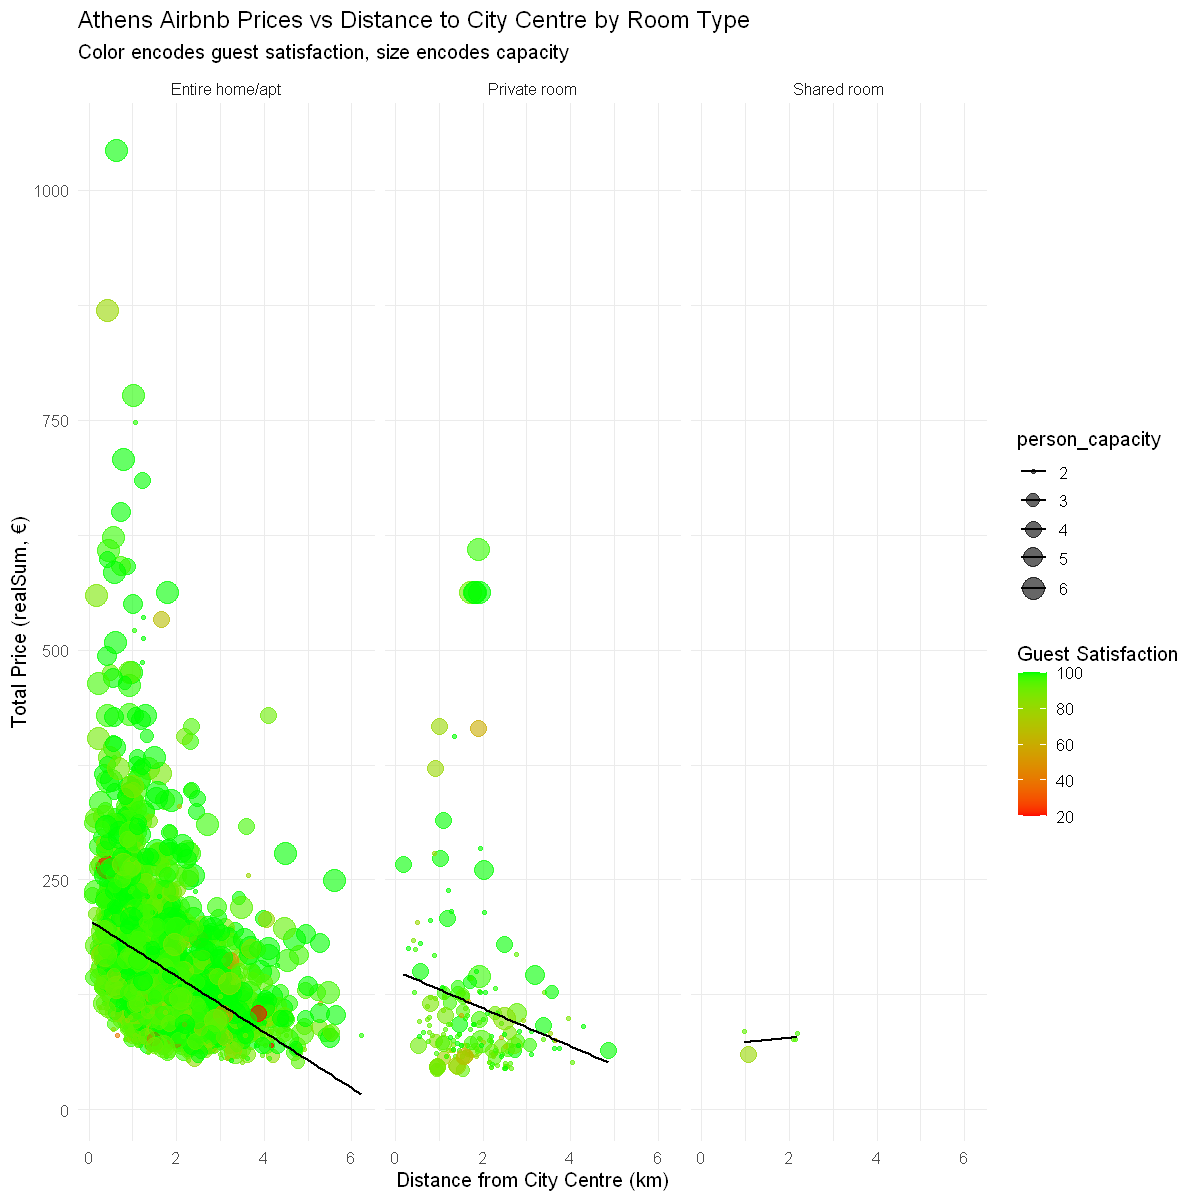

In [18]:
library(ggplot2)
# library(scales)
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(ath_wd,
       aes(x = dist, y = realSum,
           color = guest_satisfaction_overall,
           size = person_capacity)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linewidth = 0.7) +
  facet_wrap(~ room_type) +
  scale_color_gradient(low = "red", high = "green",
                       name = "Guest Satisfaction") +
#   scale_y_continuous(labels = dollar_format(prefix = "€")) +
  labs(
    title = "Athens Airbnb Prices vs Distance to City Centre by Room Type ",
    subtitle = "Color encodes guest satisfaction, size encodes capacity",
    x = "Distance from City Centre (km)",
    y = "Total Price (realSum, €)"
  ) +
  theme_minimal(base_size = 12)
